In [1]:
#PYTANIA
#BATH, PROPERTYSQFT CO ZROBIC Z WARTOSCIAMI KTORE WYGLADAJA JAK UZUPELNIENIE PUSTYCH KOMOREK?
#co zostało do wyczyszeczenia: ,'LONG_NAME' ,'FORMATTED_ADDRESS','BROKERTITLE'}

In [2]:
!pip install folium

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium


Celem jest predykcja ceny nieruchomości.

Zbiór danych zawiera 4802 instancje i kolumny określające:

 - BROKERTITLE: Title of the broker
 - TYPE: Type of the house 
number - PRICE: Price of the house, >0
 - BEDS: Number of bedrooms, only whole numbers, >0
 - BATH: Number of bathrooms, only whole numbers, >0
 - PROPERTYSQFT: Square footage of the property, >0
 - ADDRESS: Full address of the house
 - STATE: State of the house
 - MAIN_ADDRESS: Main address information
 - ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
 - LOCALITY: Locality information
 - SUBLOCALITY: Sublocality information
 - STREET_NAME: Street name
 - LONG_NAME: Long name
 - FORMATTED_ADDRESS: Formatted address
 - LATITUDE: Latitude coordinate of the house
 - LONGITUDE: Longitude coordinate of the house

In [4]:
url = 'NY-House-Dataset.csv'
data = pd.read_csv(url, sep= ';')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [6]:
data['PRICE'] = data['PRICE'].astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   float64
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,4801.0,2.356940e+06,3.135525e+07,2494.000000,499000.000000,825000.000000,1.495000e+06,2.147484e+09
BEDS,4801.0,3.356801e+00,2.602315e+00,1.000000,2.000000,3.000000,4.000000e+00,5.000000e+01
BATH,4801.0,2.373861e+00,1.946962e+00,0.000000,1.000000,2.000000,3.000000e+00,5.000000e+01
PROPERTYSQFT,4801.0,2.184208e+03,2.377141e+03,230.000000,1200.000000,2184.207862,2.184208e+03,6.553500e+04
LATITUDE,4801.0,4.071423e+01,8.767557e-02,40.499546,40.639375,40.726749,4.077192e+01,4.091273e+01
LONGITUDE,4801.0,-7.394160e+01,1.010825e-01,-74.253033,-73.987143,-73.949189,-7.387064e+01,-7.370245e+01


In [9]:
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000.0,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000.0,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000.0,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000.0,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000.0,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [10]:
numeric_columns = {'PRICE', 'BEDS','BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'}
category_columns = {'TYPE', 'BROKERTITLE', 'STATE', 'LONG_NAME', 'LOCALITY', 'ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'MAIN_ADDRESS', 'FORMATTED_ADDRESS', 'STREET_NAME'}

In [11]:
for column in category_columns:
    data[column] = data[column].str.lower()

In [12]:
data[list(category_columns)].nunique()

FORMATTED_ADDRESS              4550
SUBLOCALITY                      21
ADMINISTRATIVE_AREA_LEVEL_2      29
BROKERTITLE                    1011
STATE                           308
LOCALITY                         11
STREET_NAME                     174
TYPE                             13
LONG_NAME                      2731
ADDRESS                        4582
MAIN_ADDRESS                   4583
dtype: int64

In [13]:
data['BROKER'] = data['BROKERTITLE'].str.replace('brokered by ', '')
data['BROKER'] = data['BROKER'].str.replace('llc','')
data['BROKER'] = data['BROKER'].str.replace('inc','')
data['BROKER'] = data['BROKER'].str.replace('rlty','realty')
data['BROKER'] = data['BROKER'].str.replace('.','')
def split_by_delimeter(value, separator):
    result = value.split(separator)[0] if separator in value else value
    result = result.strip()
    return result

data['BROKER'] = data['BROKER'].apply(lambda x: split_by_delimeter(x, ' -'))

In [14]:
data['BROKER']

0                      douglas elliman
1                              serhant
2                           sowae corp
3                              compass
4       sotheby's international realty
                     ...              
4796                           compass
4797                   mjr real estate
4798                   douglas elliman
4799       e realty international corp
4800                nyc realty brokers
Name: BROKER, Length: 4801, dtype: object

In [15]:
col_to_remove = {'MAIN_ADDRESS','ADDRESS', 'LONG_NAME', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LONG_NAME' ,'BROKERTITLE', 'STREET_NAME'}
data.drop(columns=col_to_remove, inplace=True)
category_columns = list(category_columns-col_to_remove)
numeric_columns = list(numeric_columns)

In [16]:
import re
data['FORMATTED_ADDRESS'] = data['FORMATTED_ADDRESS'].str.replace('parking, ', '')
data['NUMBER'] = data['FORMATTED_ADDRESS'].str.count(',')
data['FORMATTED_ADDRESS'] = data['FORMATTED_ADDRESS'].str.replace(', usa', '')

data['SPLIT_ADDRESS'] = data['FORMATTED_ADDRESS'].str.split(',')
data['STREET_NAME'] = data.apply(lambda row: 
                                      row['SPLIT_ADDRESS'][1] if row['NUMBER'] == 4 else row['SPLIT_ADDRESS'][0], 
                                      axis=1)

addresses_shortcut = {
        ' st': ' street',
        ' ave': ' avenue',
        ' rd': ' road',
        ' blvd': ' boulevard',
        ' dr': ' drive',
        ' pkwy': ' parkway',
        ' ct': ' court',
        ' ln': ' lane',
        ' pl': ' place',
        ' sq': ' square',
        ' apt': '',
        ' ste': '',
        ' num': ''
    }

for add in addresses_shortcut.keys():
    data['STREET_NAME'] = data['STREET_NAME'].str.replace(add, addresses_shortcut[add])

def clean_street_names(street_name):
    
    parts = street_name.split(' ')
    cleaned_parts = [part for part in parts if re.match(r'^\d*(?:th|st|rd|nd)?$', part) or not any(c.isdigit() for c in part) ]
    cleaned_parts = [part for part in cleaned_parts if not part.isdigit() and len(part) != 1]
    
    last_part = cleaned_parts[-1] if cleaned_parts else None
    if last_part and any(character.isdigit() for character in last_part):
        cleaned_parts.remove(last_part)

    return ' '.join(cleaned_parts)

data['STREET_NAME'] = data['STREET_NAME'].apply(clean_street_names)
data.drop(columns=['SPLIT_ADDRESS', 'NUMBER'], inplace=True) 
data['STREET_NAME'] 

0           55th street
1           57th street
2       sinclair avenue
3           55th street
4           64th street
             ...       
4796        80th street
4797         62nd drive
4798        21st street
4799      corona avenue
4800     neptune avenue
Name: STREET_NAME, Length: 4801, dtype: object

In [17]:
data[['STATE', 'STATE_CODE']] = data['STATE'].str.split(', ', expand = True)

state_replacements = {
    'ny': 'new york',
    'nyc': 'new york',
    'new yorkc': 'new york',
    'new york city': 'new york',
    'kew gardens hill': 'kew garden hills',
    'kew gardens': 'kew garden hills',
    'kew gardens hills': 'kew garden hills',
    'kew gardens hillss': 'kew garden hills',
    'bronx new york': 'bronx',
    'queens village': 'queens',
    'bronx ny': 'bronx',
    'brooklyn heights': 'brooklyn'
}
data['STATE'] = data['STATE'].replace(state_replacements)
data


,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,BROKER,STREET_NAME,STATE_CODE
0,condo for sale,315000.0,2,2.000000,1400.000000,new york,new york,manhattan,"regis residence, 2 e 55th st #803, new york, n...",40.761255,-73.974483,douglas elliman,55th street,ny 10022
1,condo for sale,195000000.0,7,10.000000,17545.000000,new york,new york,new york county,"217 w 57th st, new york, ny 10019",40.766393,-73.980991,serhant,57th street,ny 10019
2,house for sale,260000.0,4,2.000000,2015.000000,staten island,new york,richmond county,"620 sinclair ave, staten island, ny 10312",40.541805,-74.196109,sowae corp,sinclair avenue,ny 10312
3,condo for sale,69000.0,3,1.000000,445.000000,manhattan,new york,new york county,"2 e 55th st, new york, ny 10022",40.761398,-73.974613,compass,55th street,ny 10022
4,townhouse for sale,55000000.0,7,2.373861,14175.000000,new york,new york,new york county,"5 e 64th st, new york, ny 10065",40.767224,-73.969856,sotheby's international realty,64th street,ny 10065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,co-op for sale,599000.0,1,1.000000,2184.207862,manhattan,new york county,new york,"222 e 80th st #3a, new york, ny 10075",40.774350,-73.955879,compass,80th street,ny 10075
4797,co-op for sale,245000.0,1,1.000000,2184.207862,rego park,new york,queens county,"97-40 62nd dr, rego park, ny 11374",40.732538,-73.860152,mjr real estate,62nd drive,ny 11374
4798,co-op for sale,1275000.0,1,1.000000,2184.207862,new york,new york,new york county,"427 w 21st st, new york, ny 10011",40.745882,-74.003398,douglas elliman,21st street,ny 10011
4799,condo for sale,598125.0,2,1.000000,655.000000,elmhurst,queens county,queens,"91-23 corona ave. #4b, flushing, ny 11373",40.742770,-73.872752,e realty international corp,corona avenue,ny 11373


In [18]:
import re
pattern = r'(ny \d{5})'

data['NY_ZIPCODE'] = data['FORMATTED_ADDRESS'].str.extract(pattern, flags=re.IGNORECASE)
data = data.dropna(subset=['NY_ZIPCODE'])
different_values_count = (data['NY_ZIPCODE'] != data['STATE_CODE']).sum()

print("Number of different values in 'NY_ZIPCODE' and 'STATE_CODE':", different_values_count)
data.drop(columns=['FORMATTED_ADDRESS'], inplace=True) 
data[data['NY_ZIPCODE'] != data['STATE_CODE']]

Number of different values in 'NY_ZIPCODE' and 'STATE_CODE': 63


,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,BROKER,STREET_NAME,STATE_CODE,NY_ZIPCODE
331,for sale,799000.0,3,1.0,585.000000,new york,new york county,new york,40.780472,-73.987143,"nest seekers international, westside",riverside boulevard,ny 10069,ny 10023
456,multi-family home for sale,950000.0,6,2.0,2184.207862,corona,new york,queens county,40.760813,-73.866919,re/max team,102nd street,ny 11368,ny 11369
465,multi-family home for sale,825000.0,12,6.0,2184.207862,brooklyn,new york,kings county,40.673946,-73.885344,stuyvesant heights realty corp,ashford street,ny 11207,ny 11230
602,co-op for sale,259000.0,2,1.0,2184.207862,kew garden hills,queens county,queens,40.704150,-73.833710,realty executives today,118th street,ny 11418,ny 11415
607,co-op for sale,259000.0,2,1.0,2184.207862,kew garden hills,queens county,queens,40.704150,-73.833710,realty executives today,118th street,ny 11418,ny 11415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,condo for sale,4075000.0,3,3.0,2150.000000,new york,new york county,new york,40.780472,-73.987143,douglas elliman,riverside boulevard,ny 10069,ny 10023
4448,co-op for sale,270000.0,2,1.0,700.000000,astoria,queens county,queens,40.776922,-73.907348,tapestry real estate of queens,33rd street,ny 11101,ny 11105
4562,co-op for sale,1950000.0,2,2.0,2184.207862,new york,new york county,new york,40.731923,-73.996820,anne,5th avenue,ny 10003,ny 10011
4573,multi-family home for sale,1388000.0,4,2.0,2520.000000,brooklyn,new york,kings county,40.620978,-73.957202,compass,avenuenue,ny 11229,ny 11230


In [19]:
data.columns

Index(['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'STATE', 'LOCALITY',
       'SUBLOCALITY', 'LATITUDE', 'LONGITUDE', 'BROKER', 'STREET_NAME',
       'STATE_CODE', 'NY_ZIPCODE'],
      dtype='object')

In [20]:
data.loc[data['TYPE'] == 'land for sale', ['BATH', 'BEDS']]

,BATH,BEDS
75,2.373861,3
77,2.373861,3
78,2.373861,3
360,2.373861,3
377,2.373861,3
392,2.373861,3
397,2.373861,3
400,2.000000,3
401,2.373861,3
402,2.373861,3


In [21]:
data.loc[data['TYPE'] == 'land for sale', ['BATH', 'BEDS']]= 0
data["TYPE"] = data["TYPE"].str.replace('condop', 'condo')
#data.loc[data['TYPE'] == 'land for sale', ['BATH', 'BEDS']]
data['ANNOUNCEMENT_TYPE'] = data['TYPE'].replace({
                                    'condo for sale': 'appartement',
                                     'townhouse for sale': 'home',
                                     'house for sale': 'home',
                                     'multi-family home for sale': 'home',
                                     'co-op for sale': 'co-op',
                                     'mobile house for sale': 'home',
                                     'land for sale': 'land',
                                     'foreclosure': 'other',
                                     'contingent': 'other',
                                     'pending': 'other',
                                     'coming soon': 'other',
                                    'for sale': 'other'})

def split_by_delimeter(value, separator):
    result = value.split(separator)[0] if separator in value else 'not specified'
    return result

data['OBJECT_TYPE'] = data['TYPE'].apply(lambda x: split_by_delimeter(x, ' for '))

In [22]:
data['LOCALITY'] = data['LOCALITY'].replace({'queens': 'queens county',
                                     'new york': 'new york county',
                                     'the bronx': 'bronx county',
                                     'flatbush': 'brooklyn county',
                                     'brooklyn': 'brooklyn county'})


grouped_df = data.groupby('LOCALITY').agg({'LATITUDE': ['mean'],
                                      'LONGITUDE': ['mean']})

counties = list(set(data['LOCALITY']))

replace_with_closest_county = list(data[data['LOCALITY']=='united states'].index)
for ind in replace_with_closest_county:
    x1, y1 = data.loc[ind,'LONGITUDE'], data.loc[ind,'LATITUDE']
    closest_county,distance = None,20
    for county in counties:
        x2, y2 = grouped_df.loc[county, ('LONGITUDE', 'mean')], grouped_df.loc[county, ('LATITUDE', 'mean')]
        distance_check = abs(x1-x2) + abs(y1-y2)
        if distance_check<distance:
            distance = distance_check
            closest_county = county
    data.loc[ind,'LOCALITY'] = county

In [23]:
print('Duplicated rows: ', data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicated rows:  215


In [24]:
category_columns = list(set(data.columns) - set(numeric_columns))

In [25]:
for column in category_columns:
    print(column)
    print(sorted(data[column].unique()))

SUBLOCALITY
['bronx county', 'brooklyn', 'brooklyn heights', 'coney island', 'dumbo', 'east bronx', 'flushing', 'fort hamilton', 'jackson heights', 'kings county', 'manhattan', 'new york', 'new york county', 'queens', 'queens county', 'rego park', 'richmond county', 'riverdale', 'snyder avenue', 'staten island', 'the bronx']
OBJECT_TYPE
['co-op', 'condo', 'house', 'land', 'mobile house', 'multi-family home', 'not specified', 'townhouse']
STATE_CODE
['ny 10001', 'ny 10002', 'ny 10003', 'ny 10004', 'ny 10005', 'ny 10006', 'ny 10007', 'ny 10009', 'ny 10010', 'ny 10011', 'ny 10012', 'ny 10013', 'ny 10014', 'ny 10016', 'ny 10017', 'ny 10018', 'ny 10019', 'ny 10021', 'ny 10022', 'ny 10023', 'ny 10024', 'ny 10025', 'ny 10026', 'ny 10027', 'ny 10028', 'ny 10029', 'ny 10030', 'ny 10031', 'ny 10032', 'ny 10033', 'ny 10034', 'ny 10035', 'ny 10036', 'ny 10037', 'ny 10038', 'ny 10039', 'ny 10040', 'ny 10044', 'ny 10065', 'ny 10069', 'ny 10075', 'ny 10128', 'ny 10280', 'ny 10282', 'ny 10301', 'ny 10

In [26]:
for column in category_columns:
    print(column)
    data[column].value_counts().to_csv(f'categories/{column}.csv')

SUBLOCALITY
OBJECT_TYPE
STATE_CODE
STATE
NY_ZIPCODE
LOCALITY
ANNOUNCEMENT_TYPE
BROKER
STREET_NAME
TYPE


In [27]:
data['BATH'] = data['BATH'].apply(lambda x: x if float.is_integer(x) else 0)
data[data['BATH'] == 0]

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,BROKER,STREET_NAME,STATE_CODE,NY_ZIPCODE,ANNOUNCEMENT_TYPE,OBJECT_TYPE
4,townhouse for sale,55000000.0,7,0.0,14175.000000,new york,new york county,new york county,40.767224,-73.969856,sotheby's international realty,64th street,ny 10065,ny 10065,home,townhouse
11,townhouse for sale,689000.0,3,0.0,1162.000000,staten island,new york county,richmond county,40.624996,-74.155306,re/max edge,van name avenue,ny 10303,ny 10303,home,townhouse
27,multi-family home for sale,2250000.0,12,0.0,5670.000000,brooklyn,richmond county,new york,40.602654,-73.986940,century 21 realty first,81st street,ny 11214,ny 11214,home,multi-family home
68,multi-family home for sale,1489000.0,6,0.0,3780.000000,staten island,new york county,richmond county,40.539532,-74.145088,ashford homes,wiman avenue,ny 10308,ny 10308,home,multi-family home
69,townhouse for sale,65000000.0,3,0.0,15200.000000,new york,new york county,new york county,40.776561,-73.963317,sotheby's international realty,79th street,ny 10075,ny 10075,home,townhouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,multi-family home for sale,2000000.0,8,0.0,2184.207862,brooklyn,new york county,kings county,40.614758,-73.975714,nobroker,60th street,ny 11204,ny 11204,home,multi-family home
4776,pending,555000.0,3,0.0,2184.207862,staten island,new york county,richmond county,40.540344,-74.204106,century 21 kr realty,streetafford avenue,ny 10309,ny 10309,other,not specified
4783,multi-family home for sale,799000.0,6,0.0,2000.000000,bronx,new york county,bronx county,40.902780,-73.854059,silverside realty,carpenter avenue,ny 10470,ny 10470,home,multi-family home
4788,co-op for sale,4750000.0,3,0.0,2969.000000,new york,new york county,new york,40.784392,-73.953840,j shayovitz real estate corp,park avenue,ny 10128,ny 10128,co-op,co-op


In [28]:
q_90 = data['PRICE'].quantile(0.95)

data = data[(data['PRICE'] >= 0) & (data['PRICE'] <= q_90)]

In [29]:
data['PRICE'].value_counts()

PRICE
699000.0     51
599000.0     47
799000.0     45
499000.0     41
1250000.0    41
             ..
1685000.0     1
697777.0      1
548800.0      1
669999.0      1
598125.0      1
Name: count, Length: 1137, dtype: int64

In [30]:
data['BATH'].value_counts()

BATH
2.0     1579
1.0     1455
3.0      438
4.0      402
0.0      244
6.0       88
5.0       84
8.0       28
7.0       16
9.0        5
16.0       4
10.0       4
12.0       3
20.0       2
32.0       1
11.0       1
24.0       1
17.0       1
Name: count, dtype: int64

In [31]:
data['BEDS'].value_counts()

BEDS
3     1313
2      943
1      778
4      492
5      283
6      229
7       80
8       68
0       47
9       36
12      21
11      18
10      16
14       6
13       5
15       5
16       4
24       3
32       2
35       1
20       1
36       1
40       1
30       1
19       1
18       1
Name: count, dtype: int64

In [32]:
data['PROPERTYSQFT1000'] = data['PROPERTYSQFT'].apply(lambda x: x//1000)
data['PROPERTYSQFT1000'].value_counts()

PROPERTYSQFT1000
2.0     1967
1.0     1156
0.0      816
3.0      233
4.0       78
5.0       50
6.0       24
7.0        9
12.0       4
8.0        4
9.0        3
18.0       2
11.0       2
10.0       2
15.0       2
21.0       1
55.0       1
32.0       1
17.0       1
Name: count, dtype: int64

In [33]:
data.shape

(4356, 17)

In [34]:
data = data[(data['BATH'] >= 0) & (data['BATH'] <= 10)]
data = data[(data['BEDS'] >= 0) & (data['BEDS'] <= 16)]
data = data[(data['PROPERTYSQFT1000'] >= 0) & (data['PROPERTYSQFT1000'] <= 8)]
data.drop(columns=['PROPERTYSQFT1000'], inplace=True)

In [35]:
data.shape

(4331, 16)

In [36]:
data.to_excel('ssdata.xlsx')

In [37]:
print('Duplicated rows: ', data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicated rows:  0


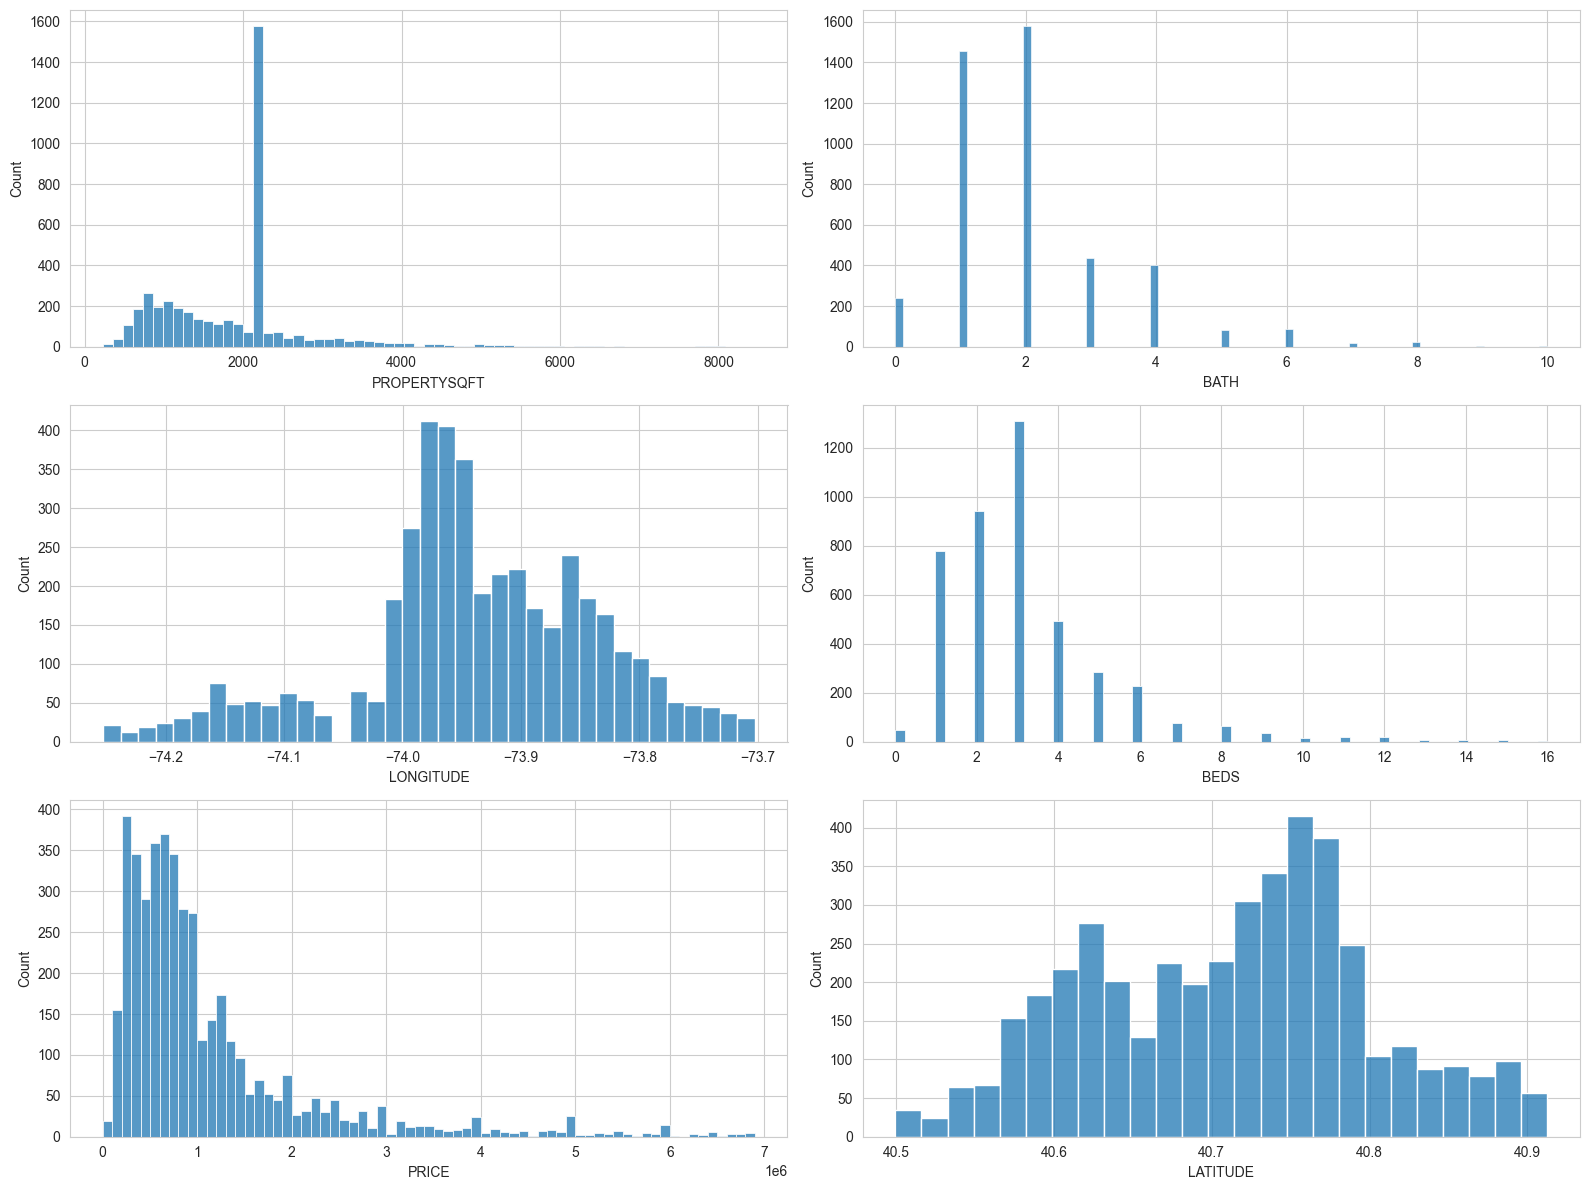

In [38]:
fig, axes = plt.subplots(3,2, figsize=(16, 12))
axes = axes.flatten()

i=0
for column in numeric_columns:
    sns.histplot(x=data[column], ax=axes[i])
    i=i+1

plt.tight_layout()
plt.show()

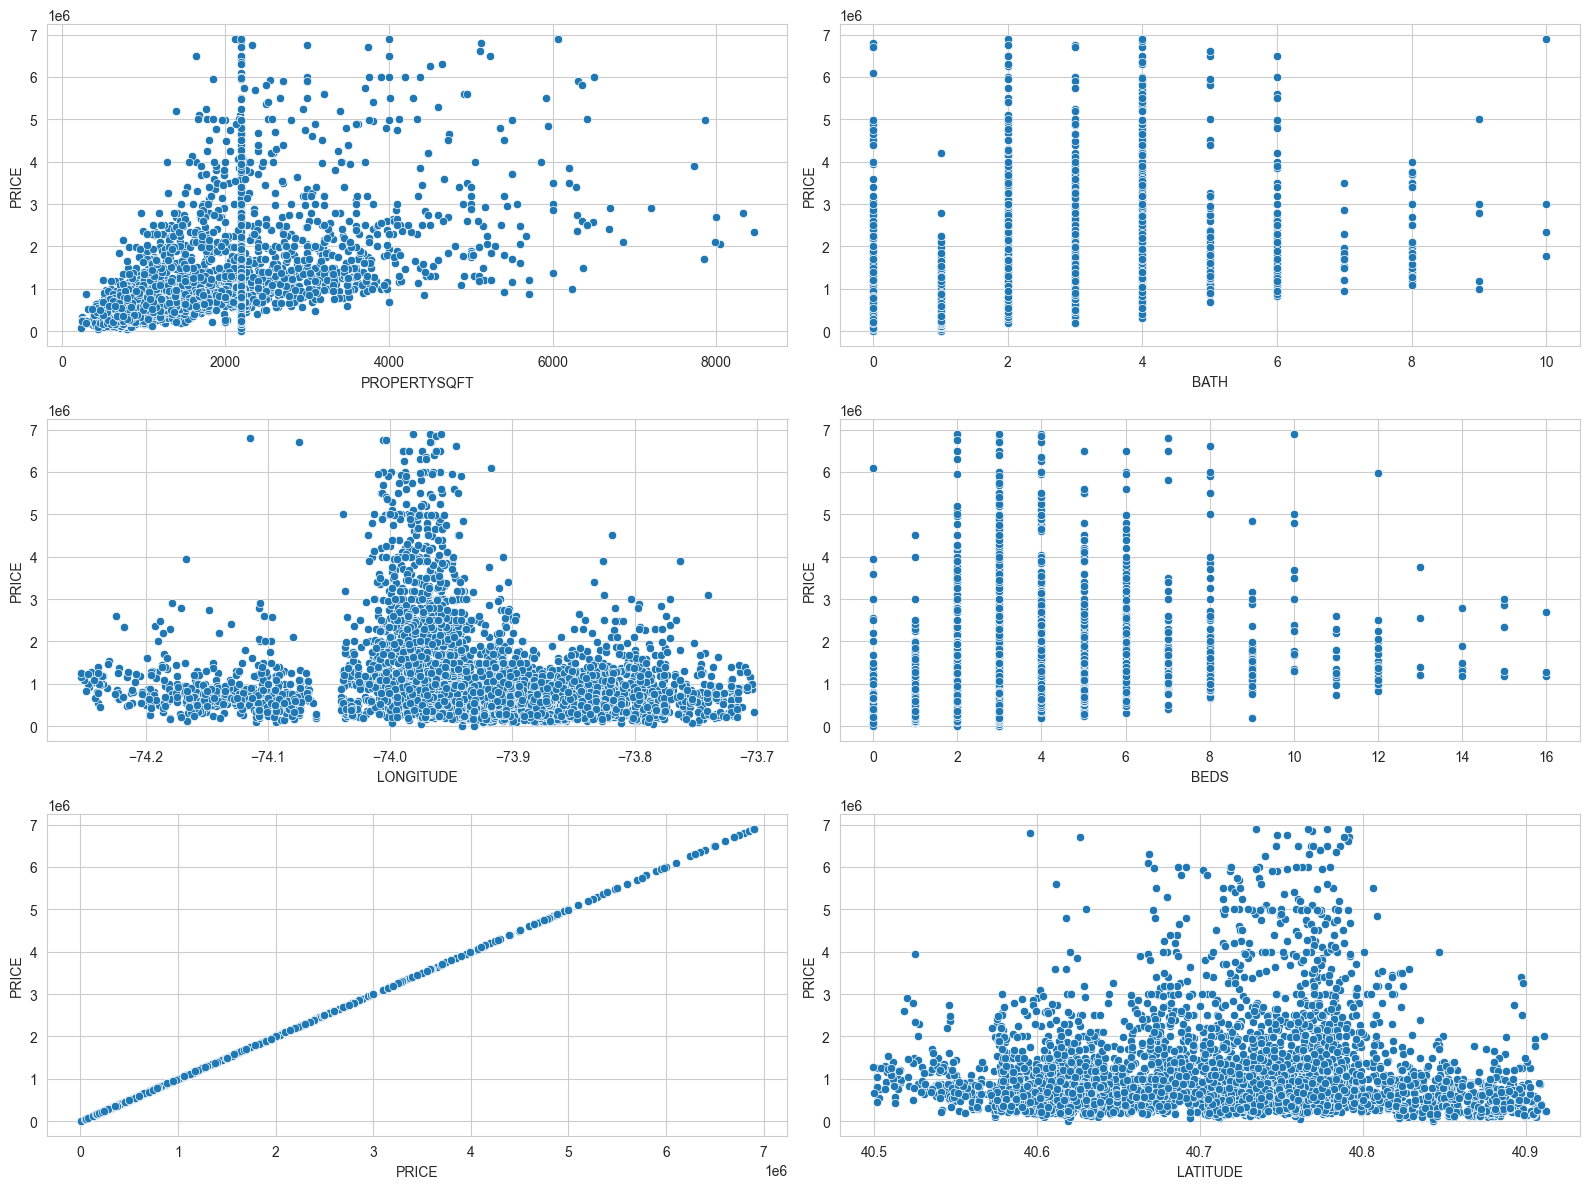

In [39]:
fig, axes = plt.subplots(3,2, figsize=(16, 12))
axes = axes.flatten()

i=0
for column in numeric_columns:
    sns.scatterplot(x=data[column], y=data['PRICE'], ax=axes[i])
    i=i+1

plt.tight_layout()
plt.show()

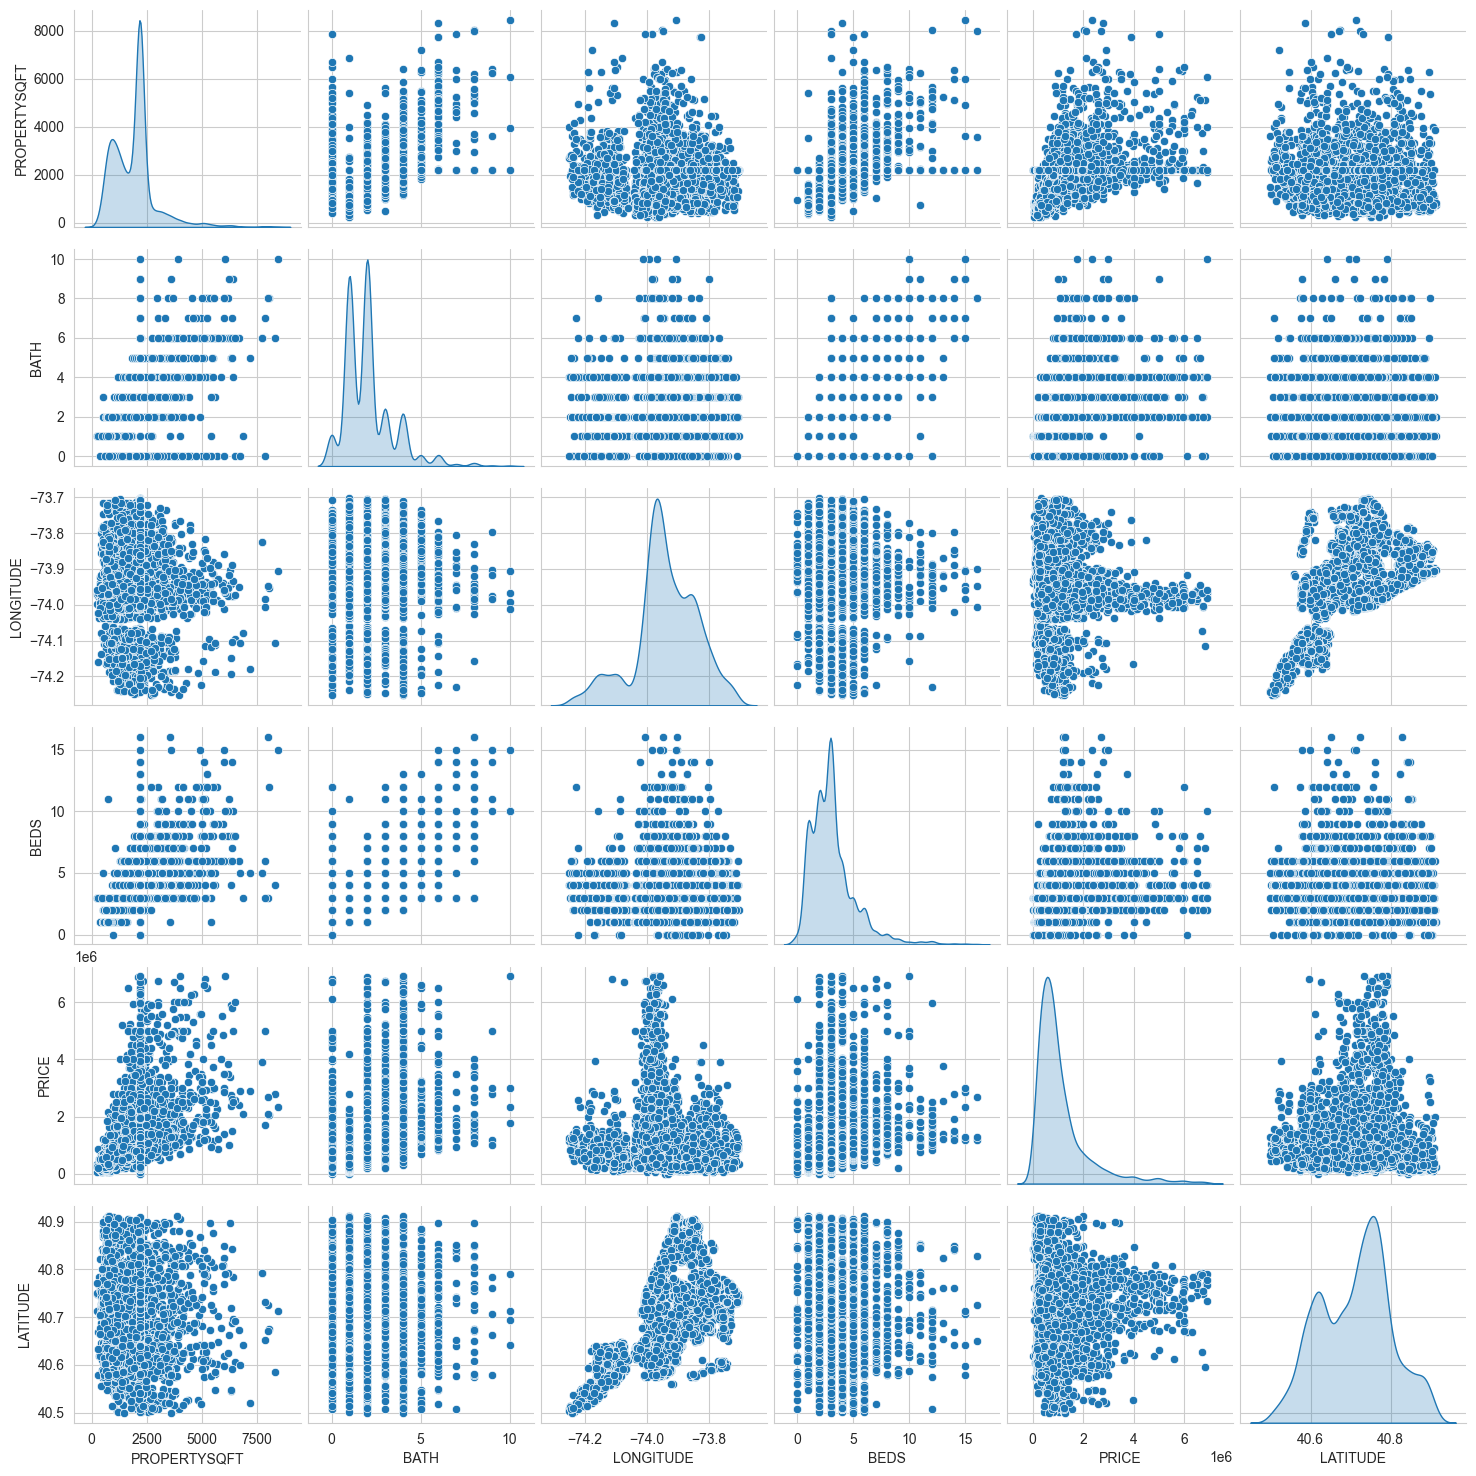

In [40]:
sns.pairplot(data[numeric_columns],height= 2.5,diag_kind = 'kde')


In [41]:
data[list(category_columns)].nunique()

SUBLOCALITY            21
OBJECT_TYPE             8
STATE_CODE            178
STATE                  63
NY_ZIPCODE            178
LOCALITY                6
ANNOUNCEMENT_TYPE       5
BROKER                945
STREET_NAME          1731
TYPE                   12
dtype: int64

<Axes: >

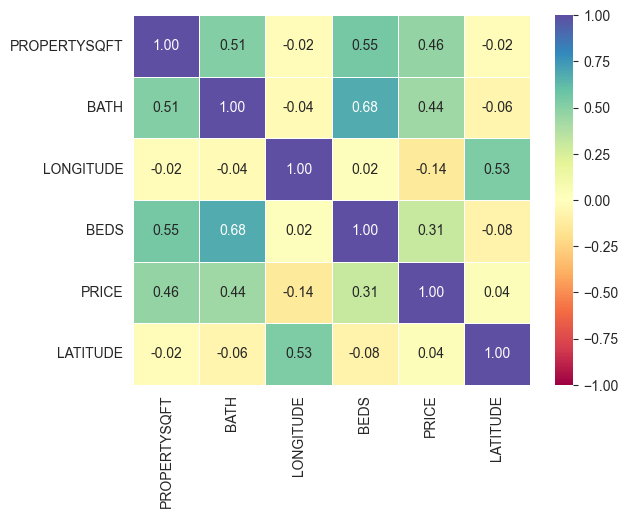

In [42]:
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f", vmax=1, vmin=-1)

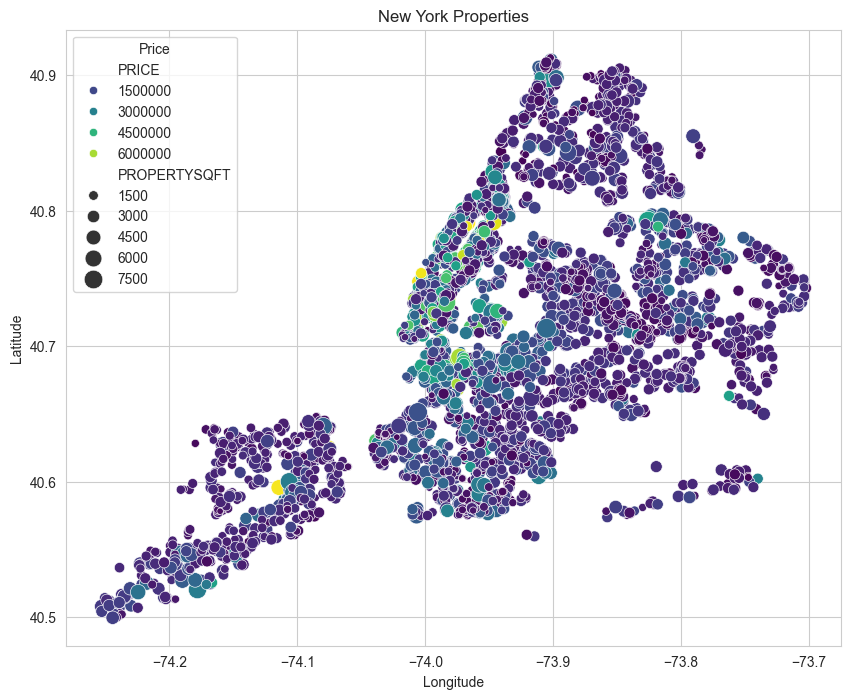

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='LONGITUDE', y='LATITUDE', hue='PRICE', palette='viridis', size='PROPERTYSQFT', sizes=(20, 200))
plt.title('New York Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', loc='upper left')
plt.grid(True)
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = data.select_dtypes(include=['float', 'int64']).columns.tolist()
columns.remove('PRICE')
print(len(columns))

mm_scalers = {}
for column in columns:
    mm_scalers[column] = MinMaxScaler()
    data[column] = mm_scalers[column].fit_transform(data[column].values.reshape(-1, 1))

5


In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in category_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [46]:
for column in category_columns:
    for class_index, class_name in enumerate(label_encoders[column].classes_):
        print(f"{class_name}: {class_index}")

bronx county: 0
brooklyn: 1
brooklyn heights: 2
coney island: 3
dumbo: 4
east bronx: 5
flushing: 6
fort hamilton: 7
jackson heights: 8
kings county: 9
manhattan: 10
new york: 11
new york county: 12
queens: 13
queens county: 14
rego park: 15
richmond county: 16
riverdale: 17
snyder avenue: 18
staten island: 19
the bronx: 20
co-op: 0
condo: 1
house: 2
land: 3
mobile house: 4
multi-family home: 5
not specified: 6
townhouse: 7
ny 10001: 0
ny 10002: 1
ny 10003: 2
ny 10004: 3
ny 10005: 4
ny 10006: 5
ny 10007: 6
ny 10009: 7
ny 10010: 8
ny 10011: 9
ny 10012: 10
ny 10013: 11
ny 10014: 12
ny 10016: 13
ny 10017: 14
ny 10018: 15
ny 10019: 16
ny 10021: 17
ny 10022: 18
ny 10023: 19
ny 10024: 20
ny 10025: 21
ny 10026: 22
ny 10027: 23
ny 10028: 24
ny 10029: 25
ny 10030: 26
ny 10031: 27
ny 10032: 28
ny 10033: 29
ny 10034: 30
ny 10035: 31
ny 10036: 32
ny 10037: 33
ny 10038: 34
ny 10039: 35
ny 10040: 36
ny 10044: 37
ny 10065: 38
ny 10069: 39
ny 10075: 40
ny 10128: 41
ny 10280: 42
ny 10282: 43
ny 10301: 4

<Axes: >

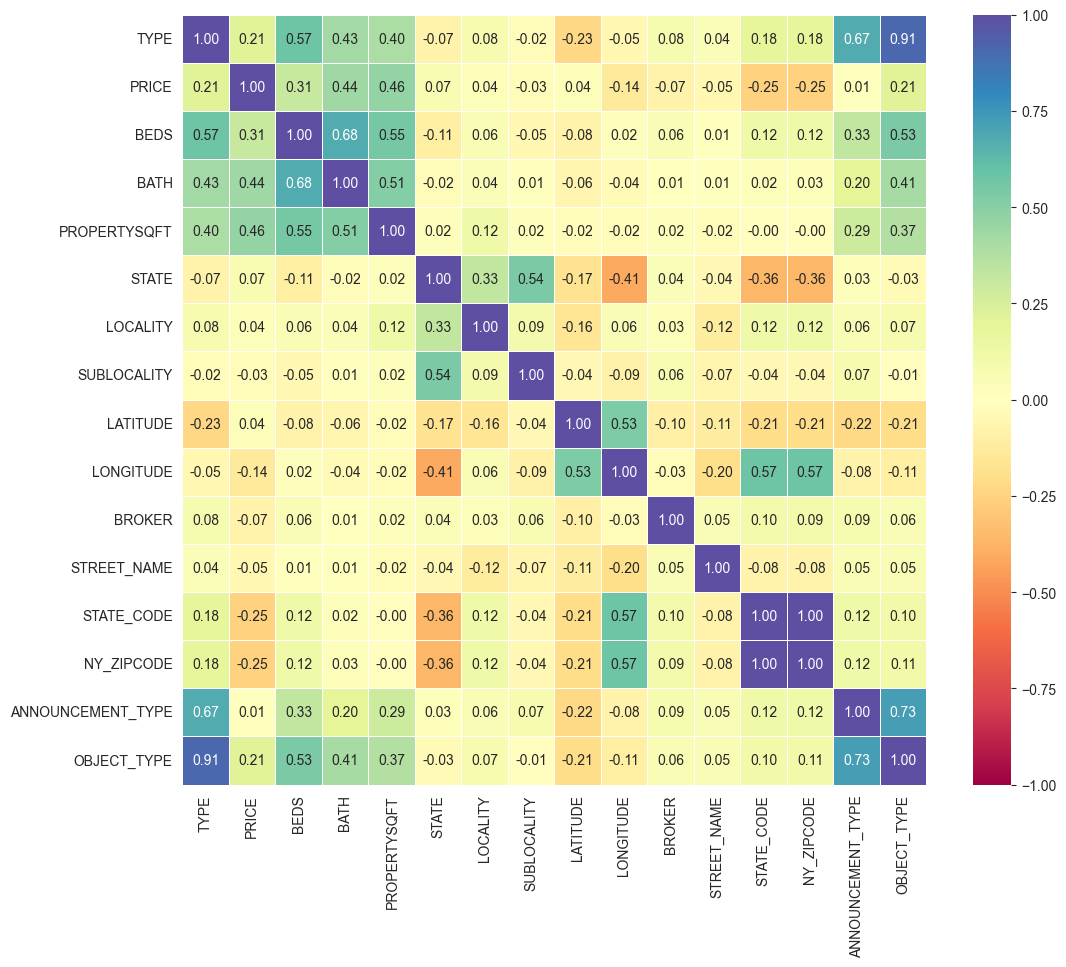

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f", vmax=1, vmin=-1)

In [48]:
corr_matrix = data.corr()
corr_df = pd.DataFrame(abs(corr_matrix['PRICE'].drop('PRICE')).sort_values(ascending=True))
relevant_columns = corr_df[corr_df['PRICE']>=0.03].index
relevant_columns = list(relevant_columns)
relevant_columns.append('PRICE')
data_relevant = data[relevant_columns]

<Axes: >

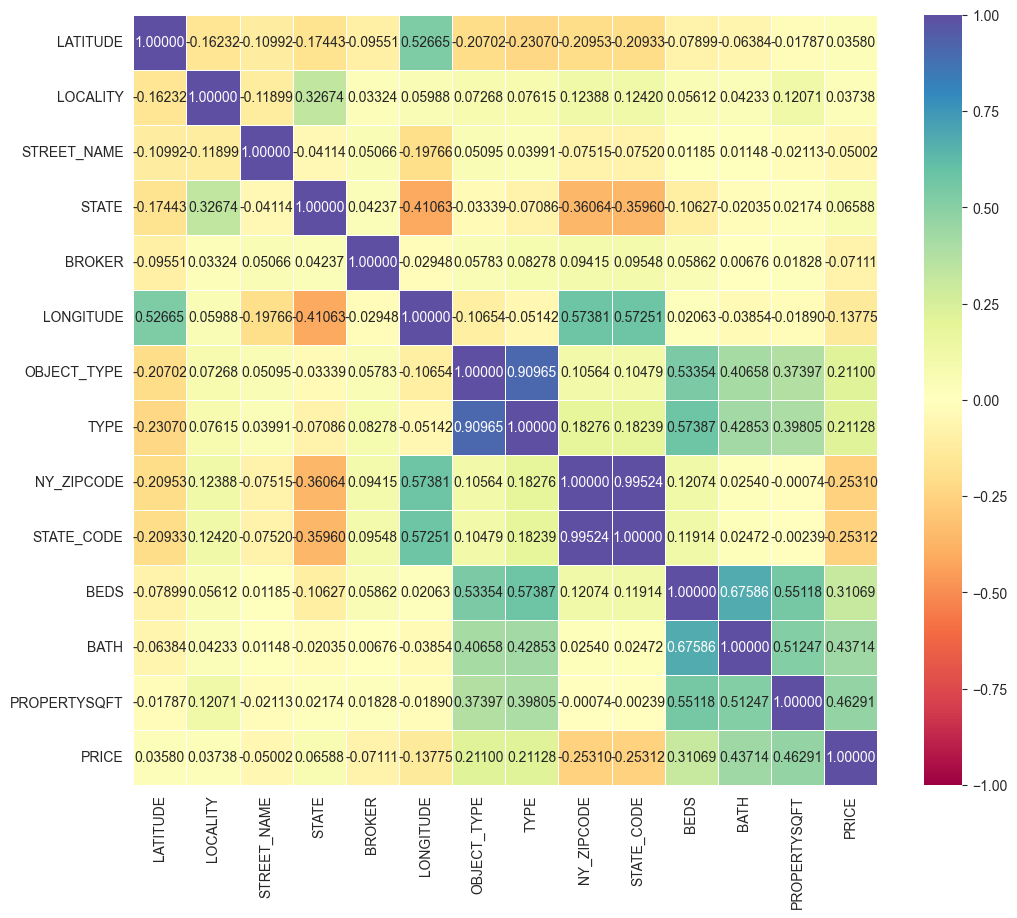

In [49]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_relevant.corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".5f", vmax=1, vmin=-1)

In [50]:
data.to_excel('clean_data.xlsx')
data_relevant.to_excel('clean_data_relevant.xlsx')

In [51]:
import pandas as pd
from scipy.stats import chi2_contingency
stat_relevant_columns = []
stat_not_relevant_columns = []
for column in data.columns:
    if column != 'PRICE':
        contingency_table = pd.crosstab(data[column], data['PRICE'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        alpha = 0.05
        if p < alpha:
            stat_relevant_columns.append(column)
        else:
            stat_not_relevant_columns.append(column)
            
print(relevant_columns)
print(stat_relevant_columns)

['LATITUDE', 'LOCALITY', 'STREET_NAME', 'STATE', 'BROKER', 'LONGITUDE', 'OBJECT_TYPE', 'TYPE', 'NY_ZIPCODE', 'STATE_CODE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE']
['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'STATE', 'LOCALITY', 'SUBLOCALITY', 'BROKER', 'STREET_NAME', 'ANNOUNCEMENT_TYPE', 'OBJECT_TYPE']


In [52]:
import numpy as np
from sklearn.decomposition import PCA
X = data_relevant.drop(columns =['PRICE'])
y = data_relevant['PRICE']

n_comp = 3
col_names = ['feature_'+str(i) for i in range(0,n_comp)]
pca = PCA(n_components=n_comp)
data_relevant_pca = pd.DataFrame(pca.fit_transform(X), columns = col_names)
print(pca.explained_variance_ratio_)
data_relevant_pca

[0.76939951 0.21482304 0.01480922]


,feature_0,feature_1,feature_2
0,-747.412429,-133.601478,-101.434059
1,799.889846,377.094981,-50.765867
2,-425.872141,-205.461351,-95.736609
3,638.004016,385.800843,54.938742
4,-677.537987,-135.974949,-93.619942
...,...,...,...
4326,-331.267168,-208.075690,-63.765735
4327,-387.934823,172.370191,74.671966
4328,-551.426539,-141.171567,-111.912451
4329,29.564355,-146.189316,89.129983


In [53]:
data_relevant_pca.to_excel('clean_data_relevant_pca.xlsx')